# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [436]:
n = 1000 
elements = ["O", "R"]
probabilities = [0.5, 0.5]
A=[]
for i in range(n):
    A.append(np.random.choice(elements, 2, p=probabilities))  
df = pd.DataFrame(A)
df["res"] = df.loc[:, :].eq("O").sum(axis=1)
R = (df[df["res"] == 1])["res"].count()
print("Вероятность того, что монеты выпали разными сторонами ", R/n)

Вероятность того, что монеты выпали разными сторонами  0.496


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [437]:
n = 10000
elements = ["O", "R"]
probabilities = [0.5, 0.5]
V=[]
for i in range(n):
    V.append(np.random.choice(elements, 3, p=probabilities))  
df = pd.DataFrame(V)
df["res"] = df.loc[:, :].eq("O").sum(axis=1)
#print(df)
A = (df[df["res"] == 0])["res"].count()
B = (df[df["res"] == 2])["res"].count()
C = (df[df[2] == "O"])[2].count() 
print("Вероятность того, что не выпало ни одного герба ", A/n)
print("Вероятность того, что выпало четное число гербов ", B/n)
print("Вероятность того, что на третьей монете выпал герб ", C/n)
print("множество элементарных событий ",df.drop_duplicates())

Вероятность того, что не выпало ни одного герба  0.1232
Вероятность того, что выпало четное число гербов  0.3837
Вероятность того, что на третьей монете выпал герб  0.5057
множество элементарных событий      0  1  2  res
0   R  O  R    1
2   R  R  R    0
3   O  O  O    3
4   O  O  R    2
8   O  R  O    2
10  O  R  R    1
20  R  O  O    2
21  R  R  O    1


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [438]:
n = 1000
elements = ["L", "E","O"]
probabilities = [1/3, 1/3,1/3]
V=[]
for i in range(n):
    V.append(np.random.choice(elements, 3, p=probabilities))  
df = pd.DataFrame(V)
A = (df[df.loc[:, :].eq("L").sum(axis=1) >= 2])[1].count()
B = (df[df.loc[:, :].eq("E").sum(axis=1) >= 2])[1].count()
print("Вероятность того, что рекомендован L ", A/n)
print("Вероятность того, что рекомендован E ", B/n)

Вероятность того, что рекомендован L  0.247
Вероятность того, что рекомендован E  0.264


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [439]:
n = 10000
V=[]
for i in range(n):
    V.append(np.random.choice(range(1,7), 2))  
df = pd.DataFrame(V)
df
A = (df[df.loc[:, :].eq(6).sum(axis=1) == 1])[1].count()
B = (df[df.loc[:, :].sum(axis=1) >= 11])[1].count()
C = (df[df.loc[:, :].eq(6).sum(axis=1) == 0])[1].count() 
print("Вероятность того, что вышло две шестерки ", A/n)
print("Вероятность того, что сумма выпавших очков не меньше 11 ", B/n)
print("Вероятность того, что не выпала ни одна шестерка ", C/n)
print("множество элементарных событий ",df.drop_duplicates())

Вероятность того, что вышло две шестерки  0.2715
Вероятность того, что сумма выпавших очков не меньше 11  0.0803
Вероятность того, что не выпала ни одна шестерка  0.7018
множество элементарных событий       0  1
0    1  6
1    6  3
2    1  4
3    4  4
4    6  2
5    6  4
6    6  5
7    5  6
8    4  2
9    5  3
10   1  1
11   5  1
12   1  3
13   4  6
14   4  3
15   5  2
16   3  6
17   6  1
18   3  4
19   6  6
22   3  3
23   2  4
24   2  3
26   1  2
27   2  5
29   1  5
37   3  5
38   4  1
45   3  2
47   5  5
58   3  1
59   2  2
77   2  6
82   2  1
127  4  5
159  5  4


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [440]:
n = 100000
V=[]
for i in range(n):
    V.append(np.random.choice(range(1,7), 2))  
df = pd.DataFrame(V)
df
D = (df[df.loc[:, :].eq(6).sum(axis=1) >= 1])[1].count()
print("Вероятность того, что выпала хотя бы одна шестёрка ", D/n)

Вероятность того, что выпала хотя бы одна шестёрка  0.30733


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [441]:
n = 10000
V=[]
for i in range(n):
    V.append(np.random.choice(range(0,10), 3))  
df = pd.DataFrame(V)
df
A = (df.loc[(df[0] != df[1]) & (df[1] != df[2]) & (df[0] != df[2])])[1].count()
B = (df.loc[(df[0] == df[1]) & (df[1] == df[2]) & (df[0] == df[2])])[1].count()
C = round(1 - A/n,3)
D = round(1 - B/n,3)
print("Вероятность того, что Стерлись различные цифры ", A/n)
print("Вероятность того, что Стерлись одинаковые цифры ", B/n)
print("Вероятность того, что Среди стершихся цифр хотя бы две совпадают ", C)
print("Вероятность того, что Среди стершихся цифр хотя бы две различны ", D)

Вероятность того, что Стерлись различные цифры  0.7129
Вероятность того, что Стерлись одинаковые цифры  0.0097
Вероятность того, что Среди стершихся цифр хотя бы две совпадают  0.287
Вероятность того, что Среди стершихся цифр хотя бы две различны  0.99


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [442]:
bernoulli_rv = sts.bernoulli(0.1) # задаётся один параметр -- вероятность успеха

bernoulli_rv.rvs(10)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

[]

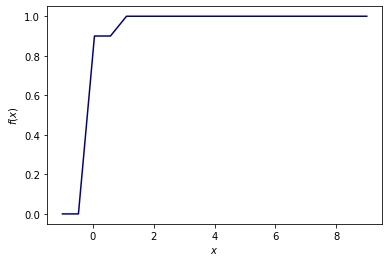

In [443]:
x = np.linspace(-1,9,num=20)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

[]

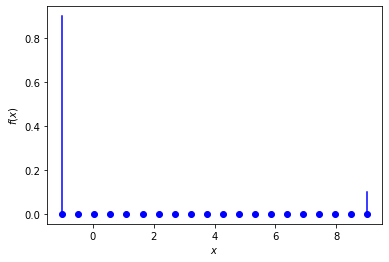

In [444]:
x = np.linspace(-1,9,num=20)
pmf = bernoulli_rv.pmf(x) 
plt.scatter(x, pmf, color="blue" )
plt.plot((-1,-1), (0,bernoulli_rv.pmf(0)), color="blue")
plt.plot((9,9), (0,bernoulli_rv.pmf(1)), color="blue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [445]:
n = 10000
V=[]
for i in range(n):
    V.append(np.random.choice(range(1,7), 2))  
df = pd.DataFrame(V)
df["sum"] = df.loc[:, :].sum(axis=1)
A = (df[df["sum"] <= 4])["sum"].count()/n
B = (df[df["sum"] > 4])["sum"].count()/n
print("Вероятность событий X <= 4 ", A)
print("Вероятность событий X > 4 ", B)
PX = df.groupby(["sum"])[0].count().reset_index()
PX["P"] = PX[0]/n
print("закон распределения случайной величины 𝑋 \n", PX)

Вероятность событий X <= 4  0.1656
Вероятность событий X > 4  0.8344
закон распределения случайной величины 𝑋 
     sum     0       P
0     2   304  0.0304
1     3   514  0.0514
2     4   838  0.0838
3     5  1166  0.1166
4     6  1341  0.1341
5     7  1712  0.1712
6     8  1384  0.1384
7     9  1084  0.1084
8    10   848  0.0848
9    11   558  0.0558
10   12   251  0.0251


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [446]:
#11 - валет
#12 - дама
#13 - король
#14 - туз
cards = ['6', '7', '8', '9', '10', '11', '12', '13', '14']
#Diamonds (Бубы / Алмазы)
#Hearts (Черви / Сердца)
#Clubs (Трефы / Клубы)
#Spades (Пики / Лопаты)
suits = ["Diamonds","Hearts", "Clubs", "Spades"]
V = []
for suit in suits:
     for card in cards:
            B = (suit,card)
            V.append(B)     
n = 10000
dataCard = []
for i in range(n):
    card1 = random.choice(V) #вынимаем 1 карту
    V2 = V.copy()
    V2.remove(card1) #убираем 1 карут из выборки (без возвращений)
    card2 = random.choice(V2) #вынимаем 2 карту
    B = card1 + card2 #запоминаем обе вынутые карты
    dataCard.append(B) #добавляем попытку в список
df = pd.DataFrame(dataCard)
C67 = (df[(df[1] == "6") & (df[3]=="7")])[0].count()/n
print("вероятность того, что первой картой была шестерка, а второй — семерка равна ", C67)
C67Diamonds = (df[(df[1] == "6") & (df[3]=="7")& (df[2]== "Diamonds")&(df[0]== "Diamonds")])[0].count()/n
print("вероятность того, что первой картой была шестерка, а второй  — семерка и обе карты бубновой масти равна ", C67Diamonds)

вероятность того, что первой картой была шестерка, а второй — семерка равна  0.0138
вероятность того, что первой картой была шестерка, а второй  — семерка и обе карты бубновой масти равна  0.0006


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [447]:
def fill_urn (n_white, n_black=0):
    return ["white"]*n_white + ['black']*n_black
B1 = fill_urn(n_white = 2,n_black=3)
n = 100000
dataA = []
for i in range(n):
    #выбираем первый шар
    ball1 = random.choice(B1)
    if ball1 == 'black': #Если шар черный
        B2 = fill_urn(n_white = 3,n_black=2) # добавляем 1 белый шар убираем 1 черный
    else:
        B2 = fill_urn(n_white = 1,n_black=3) #  убираем 1 белый шар
    ball2 = random.choice(B2)
    B = [ball1,ball2]
    dataA.append(B)
df = pd.DataFrame(dataA)
df["res_white"] = df.loc[:, :].eq("white").sum(axis=1)
A = (df[df["res_white"] == 2])["res_white"].count()/n
print("Вероятность того, что извлечены два белых шара ", A)
B = (df[df["res_white"] == 0])["res_white"].count()/n
print("Вероятность того, что извлечены два черных шара ", B)

Вероятность того, что извлечены два белых шара  0.10048
Вероятность того, что извлечены два черных шара  0.24018
